In [3]:
# Esse ambiente foi importado via docker, utilizando a imagem
# docker image: https://github.com/kaggle/docker-python
# nele, já existem várias ferramentas instaladas além da praticidade de dar um docker run na imagem e já obter
# todo o ambiente necessário

import numpy as np
import pandas as pd
import sqlite3 # O data set encontrado era um sqlite, por isso utilizei uma conexão com o banco 
               #dentro do docker para realizar os estudos
from nltk.collocations import *
import nltk
from sklearn.decomposition import PCA
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

import warnings
import re
warnings.filterwarnings('ignore')

import os

cwd = os.getcwd()
files = os.listdir(cwd)
print("files in %r: %s" % (cwd, files)) 


files in '/workspace': ['Atividade02_Andre_Oliveira_Victor_Almeida.ipynb', 'Titanic EDA.ipynb', 'Titanic Andre e Victor.ipynb', 'tutorials', 'Project 6.ipynb', 'titanic_family_survivabillity.parquet', 'welcome.ipynb', 'Titanic(Andre&Victor).ipynb', 'database.sqlite', 'test.csv', '.workspace', '.ipynb_checkpoints', 'Atividade02_Andre_Oliveira_Victor_Almeida-Copy1.ipynb', 'Atividade01_Andre_Oliveira_Victor_Almeida.ipynb', '.virtual_documents', 'train.csv']


In [6]:
conn = sqlite3.connect('database.sqlite')

df = pd.read_sql_query("SELECT * FROM BoardGames", conn)

# verify that result of SQL query is stored in the dataframe
print(df.head())
print(df.shape)
conn.close()

  row_names game.id  game.type  \
0         1       1  boardgame   
1         2       2  boardgame   
2         3       3  boardgame   
3         4       4  boardgame   
4         5       5  boardgame   

                                 details.description  \
0  Die Macher is a game about seven sequential po...   
1  Dragonmaster is a trick-taking card game based...   
2  Part of the Knizia tile-laying trilogy, Samura...   
3  When you see the triangular box and the luxuri...   
4  In Acquire, each player strategically invests ...   

                                  details.image  details.maxplayers  \
0   //cf.geekdo-images.com/images/pic159509.jpg                 5.0   
1   //cf.geekdo-images.com/images/pic184174.jpg                 4.0   
2  //cf.geekdo-images.com/images/pic3211873.jpg                 4.0   
3   //cf.geekdo-images.com/images/pic285299.jpg                 4.0   
4   //cf.geekdo-images.com/images/pic342163.jpg                 6.0   

   details.maxplaytime  details

In [7]:
for col in df.columns:
    print("*",col,"-","datatype:",df[col].dtype,", unique values:",len(df[col].unique()))

* row_names - datatype: object , unique values: 90400
* game.id - datatype: object , unique values: 90400
* game.type - datatype: object , unique values: 2
* details.description - datatype: object , unique values: 90072
* details.image - datatype: object , unique values: 83400
* details.maxplayers - datatype: float64 , unique values: 96
* details.maxplaytime - datatype: float64 , unique values: 151
* details.minage - datatype: float64 , unique values: 38
* details.minplayers - datatype: float64 , unique values: 24
* details.minplaytime - datatype: float64 , unique values: 127
* details.name - datatype: object , unique values: 86732
* details.playingtime - datatype: float64 , unique values: 151
* details.thumbnail - datatype: object , unique values: 83400
* details.yearpublished - datatype: float64 , unique values: 326
* attributes.boardgameartist - datatype: object , unique values: 14086
* attributes.boardgamecategory - datatype: object , unique values: 16544
* attributes.boardgamecomp

In [8]:
df['game.type'].unique()

array(['boardgame', 'boardgameexpansion'], dtype=object)

In [9]:
print("there are","{:,}".format(df[df['game.type']=='boardgame'].shape[0]),"boardgames")

there are 76,688 boardgames


In [10]:
df = df[df['game.type']=='boardgame']

In [11]:
for col in df.columns:
    if (len(df[col].unique()) == 76688) & (('details' in col) | ('attributes' in col)):
        print("*",col,"-","datatype:",df[col].dtype,", all unique")
    elif ('details' in col) | ('attributes' in col):
        print("**",col,"-","datatype:",df[col].dtype,", unique values:",len(df[col].unique()))

** details.description - datatype: object , unique values: 76540
** details.image - datatype: object , unique values: 70724
** details.maxplayers - datatype: float64 , unique values: 95
** details.maxplaytime - datatype: float64 , unique values: 144
** details.minage - datatype: float64 , unique values: 37
** details.minplayers - datatype: float64 , unique values: 24
** details.minplaytime - datatype: float64 , unique values: 123
** details.name - datatype: object , unique values: 73112
** details.playingtime - datatype: float64 , unique values: 144
** details.thumbnail - datatype: object , unique values: 70724
** details.yearpublished - datatype: float64 , unique values: 326
** attributes.boardgameartist - datatype: object , unique values: 12528
** attributes.boardgamecategory - datatype: object , unique values: 14383
** attributes.boardgamecompilation - datatype: object , unique values: 707
** attributes.boardgamedesigner - datatype: object , unique values: 21215
** attributes.boardg

In [12]:
df['polls.suggested_playerage'] = df['polls.suggested_playerage'].fillna(0).astype('int64')

In [13]:
# This is to grab columns by type. 
# number of columns in dataframe
s = df.shape[1]
# emtpy list to store columns that will be kept
text_columns = []
number_columns = []
other_columns = []


c = list(df.columns)

for i in range(s):
    if df.iloc[:,i].dtype == 'object':
        text_columns.append(c[i])
    elif (df.iloc[:,i].dtype == 'float64') or (df.iloc[:,i].dtype == 'int64'):
        number_columns.append(c[i])
    else:
        other_columns.append(c[i])

print("Text Columns",len(text_columns))
print("Number Columns",len(number_columns))
print("Other Columns",len(other_columns))

Text Columns 30
Number Columns 51
Other Columns 0


In [14]:
text_columns.remove('details.image')
text_columns.remove('details.thumbnail')

In [15]:
for col in text_columns:
    print(col)

row_names
game.id
game.type
details.description
details.name
attributes.boardgameartist
attributes.boardgamecategory
attributes.boardgamecompilation
attributes.boardgamedesigner
attributes.boardgameexpansion
attributes.boardgamefamily
attributes.boardgameimplementation
attributes.boardgameintegration
attributes.boardgamemechanic
attributes.boardgamepublisher
polls.language_dependence
polls.suggested_numplayers.1
polls.suggested_numplayers.10
polls.suggested_numplayers.2
polls.suggested_numplayers.3
polls.suggested_numplayers.4
polls.suggested_numplayers.5
polls.suggested_numplayers.6
polls.suggested_numplayers.7
polls.suggested_numplayers.8
polls.suggested_numplayers.9
polls.suggested_numplayers.Over
attributes.t.links.concat.2....


In [16]:
len(df['game.id']) == len(df['game.id'].unique())

True

In [17]:
len(df['row_names']) == len(df['row_names'].unique())

True

In [18]:
(df['game.id'] == df['row_names']).unique()

array([ True, False])

In [19]:
text_df = df[text_columns].set_index(['row_names', 'game.id'])

In [20]:
text_df['attributes.boardgameartist'] = text_df['attributes.boardgameartist'].str.split(',')
text_df['attributes.boardgamedesigner'] = text_df['attributes.boardgamedesigner'].str.split(',')

In [21]:
def my_tokens(row):
    try:
        word_list = nltk.word_tokenize(row)
    except:
        word_list = None
    return word_list

In [22]:
text_columns.remove('attributes.t.links.concat.2....')
text_columns.remove('attributes.boardgameartist')
text_columns.remove('attributes.boardgamedesigner')
text_columns.remove('polls.language_dependence')

In [23]:
suggested_options = set([])
for col in text_columns:
    if 'polls.suggested_numplayers' in col:
        suggested_options = suggested_options | set(text_df[col].unique())
    else:
        try:
            text_df[col] = text_df[col].apply(my_tokens)
        except:
            print(col)

row_names
game.id


In [24]:
text_df

,,game.type,details.description,details.name,attributes.boardgameartist,attributes.boardgamecategory,attributes.boardgamecompilation,attributes.boardgamedesigner,attributes.boardgameexpansion,attributes.boardgamefamily,attributes.boardgameimplementation,...,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,attributes.t.links.concat.2....
row_names,game.id,,,,,,,,,,,,,,,,,,,,,
1,1,None,None,None,[Marcus Gschwendtner],None,None,[Karl-Heinz Schmiel],None,None,None,...,NotRecommended,NotRecommended,Recommended,Best,None,None,None,None,NotRecommended,None
2,2,None,None,None,[Bob Pepper],None,None,"[G. W. ""Jerry"" D'Arcey]",None,None,None,...,NotRecommended,Recommended,Best,None,None,None,None,None,NotRecommended,None
3,3,None,None,None,[Franz Vohwinkel],None,None,[Reiner Knizia],None,None,None,...,Recommended,Best,Recommended,None,None,None,None,None,NotRecommended,None
4,4,None,None,None,None,None,None,[Christian Beierer],None,None,None,...,Recommended,Best,Best,None,None,None,None,None,NotRecommended,None
5,5,None,None,None,"[Scott Okumura, Peter Whitley]",None,None,[Sid Sackson],None,None,None,...,NotRecommended,Recommended,Best,Recommended,Recommended,None,None,None,NotRecommended,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90394,220037,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
90395,220051,None,None,None,[Jordan W. Martin],None,None,"[Luke Peterschmidt, Paul Peterson]",None,None,None,...,None,None,None,None,None,None,None,None,None,None
90396,220053,None,None,None,None,None,None,[Nate Dallas],None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [27]:
text_df.columns

Index(['game.type', 'details.description', 'details.name',
       'attributes.boardgameartist', 'attributes.boardgamecategory',
       'attributes.boardgamecompilation', 'attributes.boardgamedesigner',
       'attributes.boardgameexpansion', 'attributes.boardgamefamily',
       'attributes.boardgameimplementation', 'attributes.boardgameintegration',
       'attributes.boardgamemechanic', 'attributes.boardgamepublisher',
       'polls.language_dependence', 'polls.suggested_numplayers.1',
       'polls.suggested_numplayers.10', 'polls.suggested_numplayers.2',
       'polls.suggested_numplayers.3', 'polls.suggested_numplayers.4',
       'polls.suggested_numplayers.5', 'polls.suggested_numplayers.6',
       'polls.suggested_numplayers.7', 'polls.suggested_numplayers.8',
       'polls.suggested_numplayers.9', 'polls.suggested_numplayers.Over',
       'attributes.t.links.concat.2....'],
      dtype='object')

In [28]:
get_words_from = ['details.description', 'details.name',
       'attributes.boardgameartist', 'attributes.boardgamecategory',
       'attributes.boardgamecompilation', 'attributes.boardgamedesigner',
       'attributes.boardgameexpansion', 'attributes.boardgamefamily',
       'attributes.boardgameimplementation', 'attributes.boardgameintegration',
       'attributes.boardgamemechanic', 'attributes.boardgamepublisher',
       'attributes.t.links.concat.2....']
words = {}
for col in get_words_from:
    working_list = list(text_df[col])
    for i in working_list:
        if i != None:
            for j in i:
                j = stemmer.stem(j)
                if j in words:
                    words[j] += 1
                else:
                    words[j] = 1
len(words)

33567

In [26]:
words

{'marcus gschwendtn': 1,
 'bob pepp': 2,
 'franz vohwinkel': 353,
 'scott okumura': 8,
 'peter whitley': 13,
 'jean du poël': 45,
 's. mattusek': 1,
 'bryan k': 3,
 'doris matthäus': 149,
 'fréderic bertrand': 9,
 'marek bláha': 22,
 'andrea boekhoff': 11,
 'klemens franz': 113,
 'oliver freudenreich': 158,
 'inge georg': 1,
 'guido hoffmann': 29,
 'alexander jung': 49,
 'harald liesk': 107,
 'atelier löwentor': 4,
 'björn pertoft': 41,
 'uwe rosenberg': 62,
 'johann rütting': 112,
 'barbara stachuletz': 15,
 'markus wagn': 33,
 'allison klin': 8,
 'volkan baga': 10,
 'tanja donn': 32,
 'pete fenlon': 10,
 'jason hawkin': 6,
 'michaela kienl': 70,
 'michael menzel': 185,
 'marion pott': 5,
 'matt schwabel': 2,
 'stephen graham walsh': 8,
 'john koval': 124,
 'lüders & baran': 4,
 'stefan theur': 3,
 'john blanch': 29,
 'chris ferguson': 2,
 'anders jeppsson': 28,
 'dean morrissey': 2,
 'paul rend': 1,
 'lori wal': 2,
 'oliver vogel': 1,
 'pete abram': 6,
 'gerald brom': 11,
 'larry elm

In [34]:
import plotly.offline
import plotly.graph_objs as go
import networkx as nx
import numpy as np
import pandas as pd
import sqlite3
import re
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('database.sqlite')

df_games = pd.read_sql_query('SELECT * FROM BoardGames ', conn)

conn.close()

text_columns = []
number_columns = []
other_columns = []

c = list(df_games.columns)

for i in range(df_games.shape[1]):
    if df_games.iloc[:,i].dtype == 'object':
        text_columns.append(c[i])
    elif (df_games.iloc[:,i].dtype == 'float64') or (df_games.iloc[:,i].dtype == 'int64'):
        number_columns.append(c[i])
    else:
        other_columns.append(c[i])

In [35]:
print("TEXT COLUMNS:",len(text_columns))
for tcol in text_columns:
    print(tcol)
print('\n')
print("NUMBER COLUMNS:",len(number_columns))
for ncol in number_columns:
    print(ncol)
print('\n')
print("OTHER COLUMNS:",len(other_columns))


TEXT COLUMNS: 31
row_names
game.id
game.type
details.description
details.image
details.name
details.thumbnail
attributes.boardgameartist
attributes.boardgamecategory
attributes.boardgamecompilation
attributes.boardgamedesigner
attributes.boardgameexpansion
attributes.boardgamefamily
attributes.boardgameimplementation
attributes.boardgameintegration
attributes.boardgamemechanic
attributes.boardgamepublisher
polls.language_dependence
polls.suggested_numplayers.1
polls.suggested_numplayers.10
polls.suggested_numplayers.2
polls.suggested_numplayers.3
polls.suggested_numplayers.4
polls.suggested_numplayers.5
polls.suggested_numplayers.6
polls.suggested_numplayers.7
polls.suggested_numplayers.8
polls.suggested_numplayers.9
polls.suggested_numplayers.Over
polls.suggested_playerage
attributes.t.links.concat.2....


NUMBER COLUMNS: 50
details.maxplayers
details.maxplaytime
details.minage
details.minplayers
details.minplaytime
details.playingtime
details.yearpublished
attributes.total
stats.aver

In [36]:
text_df = df_games[text_columns]
nmplyrs_df = text_df.iloc[:, 18:29]
print(list(nmplyrs_df))
print('\n')
print(nmplyrs_df.head(10))
print(list(nmplyrs_df['polls.suggested_numplayers.1'].unique()))

['polls.suggested_numplayers.1', 'polls.suggested_numplayers.10', 'polls.suggested_numplayers.2', 'polls.suggested_numplayers.3', 'polls.suggested_numplayers.4', 'polls.suggested_numplayers.5', 'polls.suggested_numplayers.6', 'polls.suggested_numplayers.7', 'polls.suggested_numplayers.8', 'polls.suggested_numplayers.9', 'polls.suggested_numplayers.Over']


  polls.suggested_numplayers.1 polls.suggested_numplayers.10  \
0               NotRecommended                          None   
1               NotRecommended                          None   
2               NotRecommended                          None   
3               NotRecommended                          None   
4               NotRecommended                          None   
5                         None                          None   
6               NotRecommended                          None   
7               NotRecommended                          None   
8               NotRecommended                          None   
9

In [37]:
mp_dict = {'Best': 1, np.nan: 0, 'Recommended': 1, 'NotRecommended': 0}
remap_df = nmplyrs_df.replace(mp_dict)


In [38]:
num_df = df_games[number_columns]
framesCrrctd = (num_df["stats.bayesaverage"], remap_df)
num_dfCrrctd = pd.concat(framesCrrctd, axis = 1)
print(num_dfCrrctd.corr())

                                 stats.bayesaverage  \
stats.bayesaverage                         1.000000   
polls.suggested_numplayers.1               0.233111   
polls.suggested_numplayers.10              0.088432   
polls.suggested_numplayers.2               0.472946   
polls.suggested_numplayers.3               0.490173   
polls.suggested_numplayers.4               0.508446   
polls.suggested_numplayers.5               0.382141   
polls.suggested_numplayers.6               0.280296   
polls.suggested_numplayers.7               0.155778   
polls.suggested_numplayers.8               0.140504   
polls.suggested_numplayers.9               0.089540   
polls.suggested_numplayers.Over            0.175104   

                                 polls.suggested_numplayers.1  \
stats.bayesaverage                                   0.233111   
polls.suggested_numplayers.1                         1.000000   
polls.suggested_numplayers.10                        0.008606   
polls.suggested_numplaye

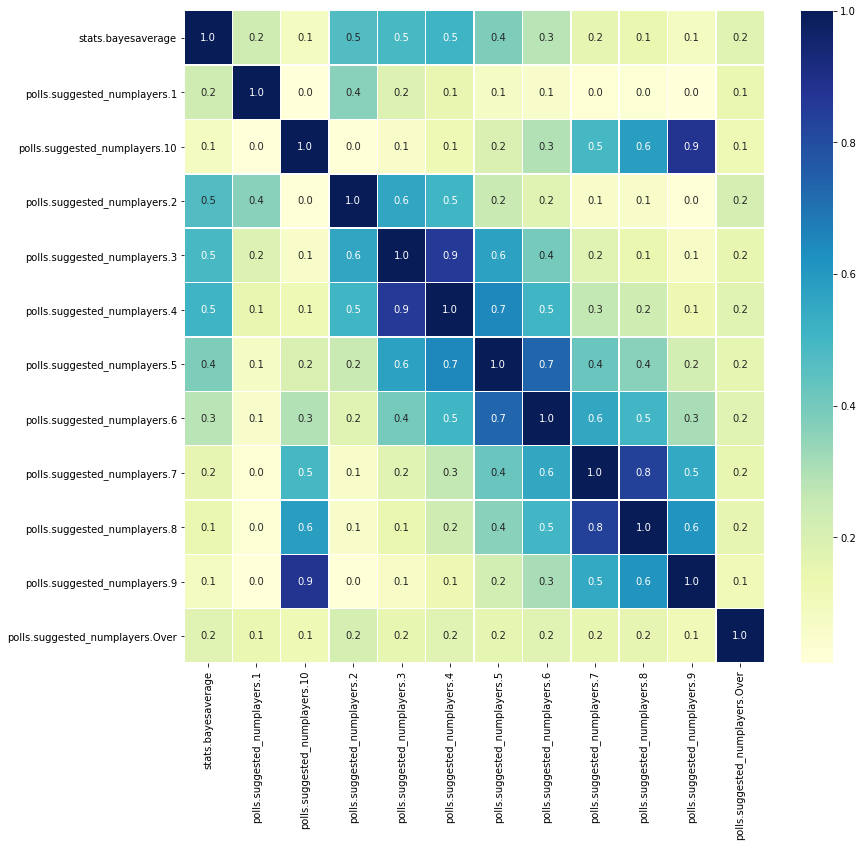

In [39]:
f,ax = plt.subplots(figsize=(13, 12))
sns.heatmap(num_dfCrrctd.corr(), cmap='YlGnBu', annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [40]:
def nKey(node):
    se = re.search('(?<=\.)\w+$', node)
    return(se.group(0))
#the regex above reads as:
# "a substring of one or more alphanumeric characters preceded by '.' and followed by the end of the string."
#note that '_' is alphanumeric, but '.' is not.

ndDict = {}
for node in list(num_dfCrrctd):
    ndDict[node] = nKey(node)

{'polls.suggested_numplayers.1': (1, 8), 'polls.suggested_numplayers.10': (2, 0), 'polls.suggested_numplayers.2': (2, 8), 'polls.suggested_numplayers.3': (1, 6), 'polls.suggested_numplayers.4': (2, 6), 'polls.suggested_numplayers.5': (1, 4), 'polls.suggested_numplayers.6': (2, 4), 'polls.suggested_numplayers.7': (1, 2), 'polls.suggested_numplayers.8': (2, 2), 'polls.suggested_numplayers.9': (1, 0), 'polls.suggested_numplayers.Over': (1, -2), 'stats.bayesaverage': (3, 3)}


TypeError: draw_networkx_edges() got an unexpected keyword argument 'cmap'

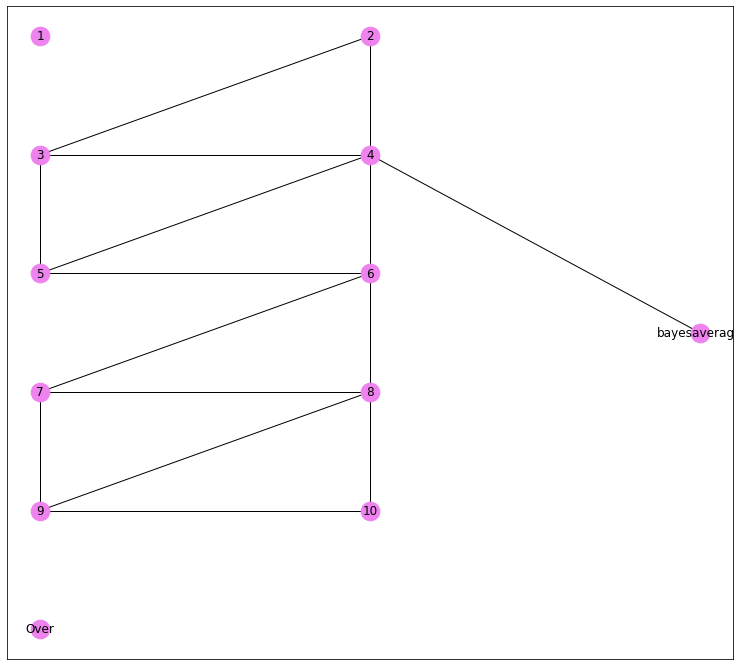

In [41]:
G = nx.Graph()
G.add_nodes_from(list(num_dfCrrctd))

df_corr = num_dfCrrctd.corr()        # The correlation matrix for our dataframe

nodelist = list(G.nodes)

uniqueEdges = list(combinations(nodelist, 2))
def weight(edge):
    return(df_corr.loc[edge])

threshold = .5                       # Controls significant correlation threshold for when edges will appear

edgelist = []
for edge in uniqueEdges:
    if weight(edge) >= threshold:
         edgelist.append(edge)

G.add_edges_from(edgelist)

edgelist = list(G.edges)             # Ensures that the order of output is static

weightD={}                           # edges and edge weights as a dict
weightE=[]                           # edge weights as a list
for edge in edgelist:
    weightD[edge] = round(weight(edge),3)
    weightE.append(round(weight(edge),3))

poslist = [(1,8),(2,0),(2,8),(1,6),(2,6),(1,4),(2,4),(1,2),(2,2),(1,0),(1,-2),(3,3)]
#these points are contrived for a better image

pos = dict(zip(sorted(nodelist), poslist))
print(pos)

plt.figure(1,figsize=(13,12))
nx.draw_networkx(G, pos, node_color='violet', node_size=350, labels=ndDict)
nx.draw_networkx_edges(G, pos, edgelist=edgelist, cmap=plt.get_cmap('Accent'), edge_color=weightE)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weightD)

plt.axis('off')
plt.show()